In [1]:
pip install gwpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 46.0.3 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.


In [2]:
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.7/182.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 16.0 MB/s eta 0:00:00
  Created wheel for pegasus-wms.api: filename=pegasus_wms.api-5.1.1-py3-none-any.whl size=51367

In [3]:
pip install gwosc

# code

In [4]:
import gwosc.datasets as g
from gwosc.datasets import event_segment
event = 'GW150914-v1'
gps = g.event_gps(event)
print(event_segment(event))
print(g.event_detectors(event))
print(g.run_at_gps(gps))

(1126257414, 1126261510)
{'L1', 'H1'}
O1


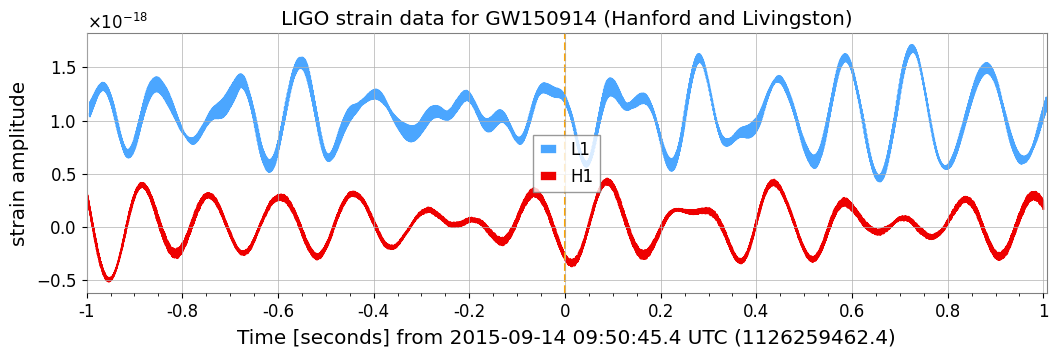

In [9]:
import gwosc.datasets as g
event = 'GW150914-v1'
gps = g.event_gps(event)

from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data("L1", gps-1,gps+1)
hdata.shift('6.9ms')
hdata *= -1
plot = hdata.plot(label = 'L1', color="gwpy:ligo-livingston")
plot.show()
h1data = TimeSeries.fetch_open_data("H1", gps-1,gps+1)

ax = plot.gca()
ax.plot(h1data,label='H1',color="gwpy:ligo-hanford")
ax.set_ylabel('strain amplitude')
ax.set_xscale('seconds',epoch=gps)
ax.set_title('LIGO strain data for GW150914 (Hanford and Livingston)')
ax.axvline(gps, color='orange', linestyle='--')
ax.legend()
plot.show()